# PainterClassifier

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.4MB/s 
     |████████████████████████████████| 194kB 8.8MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 1.2MB 11.6MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

Path and Type setup

In [ ]:
types = 'Rørbye, Martinus','Abildgaard, Nicolai','Bendz, Wilhelm',
'Dahl, J.C','Skovgaard, P.C','Küchler, Albert','Eckersberg, C.W',
'Jensen, C.A','Købke, Christen','Juel, Jens','Lundbye, Johan Thomas',
'Hansen, Constantin','Frølich, Lorenz','Marstrand, Wilhelm',
'Roed, Jørgen','Lorentzen, C.A','Dreyer, Dankvart','Lund, J.L',
'Gebauer, Christian David','Blunck, Ditlev',
'Sonne, Jørgen V','Jerichau Baumann, Elisabeth'
path = Path('gdrive/MyDrive/PBA/Deep Learning/Painters')

Test and remove failed images

In [ ]:
fns = get_image_files(path)
fns

(#642) [Path('gdrive/MyDrive/PBA/Deep Learning/Painters/Rørbye, Martinus/pic_001.jpg'),Path('gdrive/MyDrive/PBA/Deep Learning/Painters/Rørbye, Martinus/pic_013.jpg'),Path('gdrive/MyDrive/PBA/Deep Learning/Painters/Rørbye, Martinus/pic_015.jpg'),Path('gdrive/MyDrive/PBA/Deep Learning/Painters/Rørbye, Martinus/pic_014.jpg'),Path('gdrive/MyDrive/PBA/Deep Learning/Painters/Rørbye, Martinus/pic_012.jpg'),Path('gdrive/MyDrive/PBA/Deep Learning/Painters/Rørbye, Martinus/pic_011.jpg'),Path('gdrive/MyDrive/PBA/Deep Learning/Painters/Rørbye, Martinus/pic_010.jpg'),Path('gdrive/MyDrive/PBA/Deep Learning/Painters/Rørbye, Martinus/pic_009.jpg'),Path('gdrive/MyDrive/PBA/Deep Learning/Painters/Rørbye, Martinus/pic_008.jpg'),Path('gdrive/MyDrive/PBA/Deep Learning/Painters/Rørbye, Martinus/pic_007.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

DataBlock creation

In [ ]:
painters = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5))

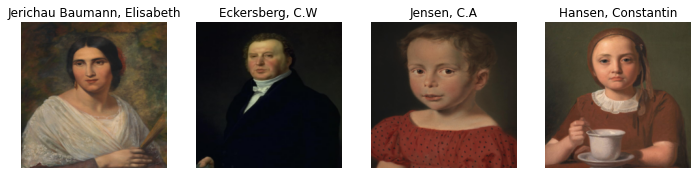

In [ ]:
dls = painters.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Train the Model

In [ ]:
#painters = painters.new(
#    item_tfms=RandomResizedCrop(224, min_scale=0.5),
#    batch_tfms=aug_transforms())
dls = painters.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(12)

epoch,train_loss,valid_loss,error_rate,time
0,4.427029,3.383397,0.875000,02:14


epoch,train_loss,valid_loss,error_rate,time
0,3.326516,2.622205,0.742188,02:48
1,3.073931,2.356616,0.640625,02:45
2,2.766596,2.269794,0.625000,02:46
3,2.448684,2.261268,0.617188,02:55
4,2.153679,2.218158,0.593750,02:46
5,1.862165,2.117301,0.546875,02:45


epoch,train_loss,valid_loss,error_rate,time
0,3.326516,2.622205,0.742188,02:48
1,3.073931,2.356616,0.640625,02:45
2,2.766596,2.269794,0.625000,02:46
3,2.448684,2.261268,0.617188,02:55
4,2.153679,2.218158,0.593750,02:46
5,1.862165,2.117301,0.546875,02:45
6,1.618131,2.102017,0.546875,02:45
7,1.417587,2.111016,0.562500,02:58
8,1.238737,2.120986,0.546875,02:47
9,1.106533,2.103409,0.539062,02:47


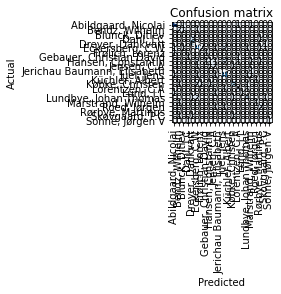

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

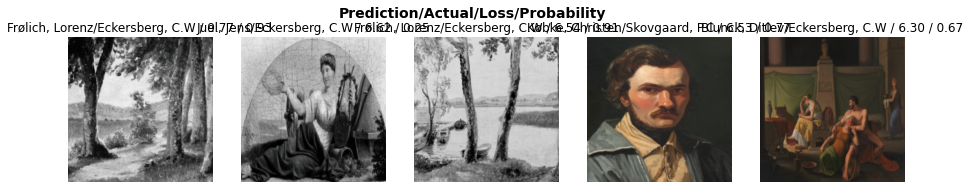

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner('export.pkl')
img = PILImage.create('gdrive/MyDrive/PBA/Deep Learning/Unknown.jpg')

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Gebauer, Christian David; Probability: 0.3028')